In [1]:
import sklearn
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from matplotlib import pyplot as plt

In [2]:
#Loading and preparing the dataset
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
labels = dataset.target_names

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

(569, 30)
(569,)


In [3]:
#Defining confusion matrix and roc curve generation functions
def generate_confusion_matrix(labels, y_test, y_pred):
  c_mat = metrics.confusion_matrix(y_test, y_pred)
  c_mat_dict = {
    labels[0] : list(c_mat[0]),
    labels[1] : list(c_mat[1])
  }
  print('--------------------------------------------------------')
  print ("{:<15} | {:<15} | {:<15} ".format('', labels[0], labels[1]))
  print('--------------------------------------------------------')
  for k, v in c_mat_dict.items():
    a, b = v
    print ("{:<15} | {:<15} | {:<15} ".format(k, a, b))
    print('--------------------------------------------------------')

def plot_roc_curve(y_test, y_pred, name):
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

  plt.plot(fpr, tpr, label=name)
  plt.plot([0, 0, 1], [0, 1, 1], label='Perfect classification', linestyle='dashed')
  plt.plot([0, 1], [0, 1], label='Random classification', linestyle='dashed')
  plt.legend()
  plt.xlabel('False Postive Rate (FPR)')
  plt.ylabel('True Postive Rate (TPR)')
  plt.show()

#1. Naive Bayes

In [4]:
#Training the Naive Bayes classifier
gnb = GaussianNB()
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)

print("%d instances were misclassified" % (y_test != gnb_pred).sum())

13 instances were misclassified


1. Accuracy : 92.4 %


2. Confusion matrix
--------------------------------------------------------
                | malignant       | benign          
--------------------------------------------------------
malignant       | 57              | 6               
--------------------------------------------------------
benign          | 7               | 101             
--------------------------------------------------------


3. ROC curve


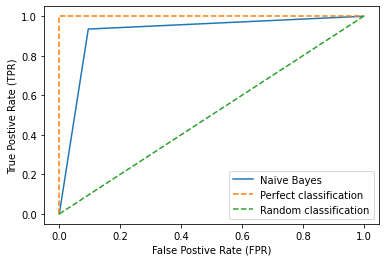

In [5]:
#Computing the accuracy
gnb_acc = round(gnb.score(X_test, y_test)*100, 2)
print("1. Accuracy : "+str(gnb_acc)+" %")

#Generating and displaying the confusion matrix
print('\n')
print('2. Confusion matrix')
generate_confusion_matrix(labels, y_test, gnb_pred)

#Plotting the ROC curve
print('\n')
print('3. ROC curve')
plot_roc_curve(y_test, gnb_pred, 'Naive Bayes')

The naive Bayes's classification is close to that of a perfect one

#2. SVM

In [6]:
#Training the SVM classifier
svm_clf = svm.SVC(gamma='auto')
svm_pred = svm_clf.fit(X_train, y_train).predict(X_test)

print("%d instances were misclassified" % (y_test != svm_pred).sum())

63 instances were misclassified


1. Accuracy : 63.16 %


2. Confusion matrix
--------------------------------------------------------
                | malignant       | benign          
--------------------------------------------------------
malignant       | 0               | 63              
--------------------------------------------------------
benign          | 0               | 108             
--------------------------------------------------------


3. ROC curve


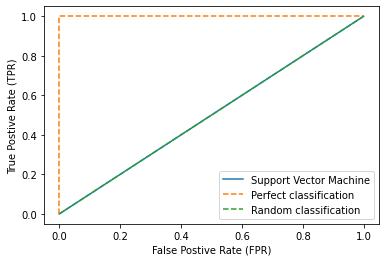

In [7]:
#Computing the accuracy
svm_acc = round(svm_clf.score(X_test, y_test)*100, 2)
print("1. Accuracy : "+str(svm_acc)+" %")


#Generating and displaying the confusion matrix
print('\n')
print('2. Confusion matrix')
generate_confusion_matrix(labels, y_test, svm_pred)

#Plotting the ROC curve
print('\n')
print('3. ROC curve')
plot_roc_curve(y_test, svm_pred, 'Support Vector Machine')

The SVM's classification is completely random

#3. Decision Trees

In [8]:
tree_clf = tree.DecisionTreeClassifier(criterion='entropy')

tree_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("%d instances were misclassified" % (y_test != tree_pred).sum())

5 instances were misclassified


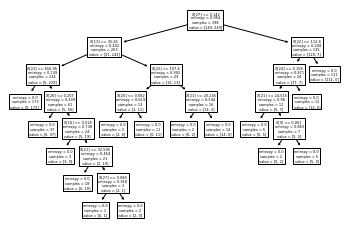

In [9]:
#Plotting our decision tree
tree.plot_tree(tree_clf)
plt.show()

1. Accuracy : 97.08 %


2. Confusion matrix
--------------------------------------------------------
                | malignant       | benign          
--------------------------------------------------------
malignant       | 61              | 2               
--------------------------------------------------------
benign          | 3               | 105             
--------------------------------------------------------


3. ROC curve


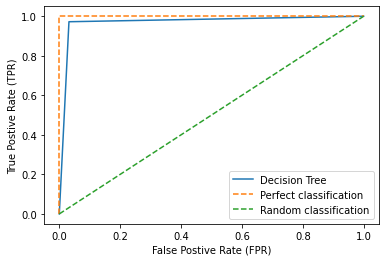

In [10]:
#Computing the accuracy
tree_acc = round(tree_clf.score(X_test, y_test)*100, 2)
print("1. Accuracy : "+str(tree_acc)+" %")


#Generating and displaying the confusion matrix
print('\n')
print('2. Confusion matrix')
generate_confusion_matrix(labels, y_test, tree_pred)

#Plotting the ROC curve
print('\n')
print('3. ROC curve')
plot_roc_curve(y_test, tree_pred, 'Decision Tree')

The Decision Tree's ROC curve is very close to a perfect model's

#4. Random Forests

In [11]:
forest = RandomForestClassifier(max_depth=2, random_state=0)

forest_pred = forest.fit(X_train, y_train).predict(X_test)
print("%d instances were misclassified" % (y_test != forest_pred).sum())

11 instances were misclassified


1. Accuracy : 93.57 %


2. Confusion matrix
--------------------------------------------------------
                | malignant       | benign          
--------------------------------------------------------
malignant       | 58              | 5               
--------------------------------------------------------
benign          | 6               | 102             
--------------------------------------------------------


3. ROC curve


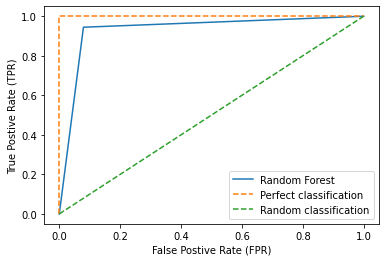

In [12]:
#Computing the accuracy
forest_acc = round(forest.score(X_test, y_test)*100, 2)
print("1. Accuracy : "+str(forest_acc)+" %")


#Generating and displaying the confusion matrix
print('\n')
print('2. Confusion matrix')
generate_confusion_matrix(labels, y_test, forest_pred)

#Plotting the ROC curve
print('\n')
print('3. ROC curve')
plot_roc_curve(y_test, forest_pred, 'Random Forest')

The Random Forest classifier, too, is close to a perfect classifier

#Comparision between classifiers

In order to compare all four classifiers, we can output their accuracies and draw their repective ROC curves on the same plot.

In [13]:
print ("{:<15} | {:<15} | {:<15} | {:<15} | {:<15}".format('Classifier', 'Naive Bayes', 'SVM', 'Decision Trees', 'Random Forest'))
print('---------------------------------------------------------------------------------------')
print ("{:<15} | {:<15} | {:<15} | {:<15} | {:<15}".format('Accuracy', str(gnb_acc), str(svm_acc), str(tree_acc), str(forest_acc)))
print('---------------------------------------------------------------------------------------')

Classifier      | Naive Bayes     | SVM             | Decision Trees  | Random Forest  
---------------------------------------------------------------------------------------
Accuracy        | 92.4            | 63.16           | 97.08           | 93.57          
---------------------------------------------------------------------------------------


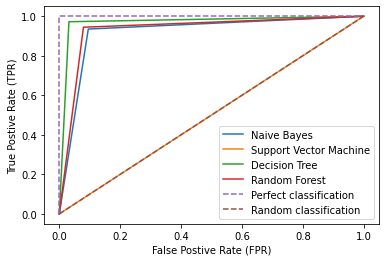

In [14]:
gnb_fpr, gnb_tpr, _ = metrics.roc_curve(y_test, gnb_pred)
svm_fpr, svm_tpr, _ = metrics.roc_curve(y_test, svm_pred)
tree_fpr, tree_tpr, _ = metrics.roc_curve(y_test, tree_pred)
forest_fpr, forest_tpr, _ = metrics.roc_curve(y_test, forest_pred)

plt.plot(gnb_fpr, gnb_tpr, label='Naive Bayes')
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine')
plt.plot(tree_fpr, tree_tpr, label='Decision Tree')
plt.plot(forest_fpr, forest_tpr, label='Random Forest')

plt.plot([0, 0, 1], [0, 1, 1], label='Perfect classification', linestyle='dashed')
plt.plot([0, 1], [0, 1], label='Random classification', linestyle='dashed')
plt.legend()
plt.xlabel('False Postive Rate (FPR)')
plt.ylabel('True Postive Rate (TPR)')
plt.show()

The Naive Bayes, Decision Tree and Random Forest classifiers are the three out of four best classifiers for this dataset, with the Random forest classifier being slightly best than the other two.